<center><h1>Panchal_Apoorva_HW8</h1></center>

Name: Apoorva Panchal
<br>
Github Username: ApoorvaPanchal
<br>
USC ID: 8685016290   

Used 1 late day

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [19]:
import zipfile
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from urllib.request import urlretrieve
from sklearn.preprocessing import StandardScaler, normalize, Normalizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_fscore_support, pairwise_distances
from tabulate import tabulate
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from scipy.special import softmax
import warnings 
warnings.filterwarnings('ignore')

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
# url = 'https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip'
# filename = '../data/cancer_diagnosis.zip'
# urlretrieve(url, filename)
# zip = zipfile.ZipFile('../data/cancer_diagnosis.zip', 'r').extractall('../data/')

In [3]:
cols = ['id_num', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concavepoints_mean', 'symmetry_mean', 'fractaldimesnion_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concavepoints_se', 'symmetry_se', 'fractaldimesnion_se',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concavepoints_worst', 'symmetry_worst', 'fractaldimesnion_worst']

data = pd.read_csv('../data/wdbc.data',delimiter=',', header=None, names=cols)
data.drop(columns=['id_num'], inplace=True)

y_labels = ['diagnosis']
X_data = data.drop(columns=y_labels)
y_data = data[y_labels]

print(X_data.head())
print(y_data.head())    

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concavepoints_mean  symmetry_mean  \
0           0.27760          0.3001             0.14710         0.2419   
1           0.07864          0.0869             0.07017         0.1812   
2           0.15990          0.1974             0.12790         0.2069   
3           0.28390          0.2414             0.10520         0.2597   
4           0.13280          0.1980             0.10430         0.1809   

   fractaldimesnion_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.

Diagnosis Labels:   
B : 0   
M : 1   

In [4]:
print(y_data['diagnosis'].value_counts())
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(np.ravel(y_data))
print(np.unique(y_data, return_counts=True))
y_data = pd.Series(y_data, name='diagnosis')


diagnosis
B    357
M    212
Name: count, dtype: int64
(array([0, 1]), array([357, 212]))


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

Iteration: 1
Confusion Matrix Test 
 [[71  1]
 [ 2 40]]
Confusion Matrix Train 
 [[285   0]
 [  4 166]]


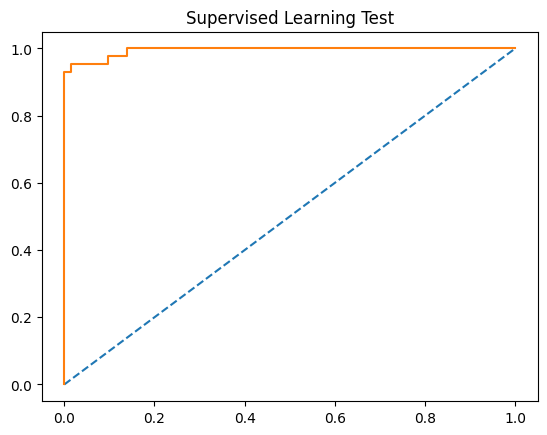

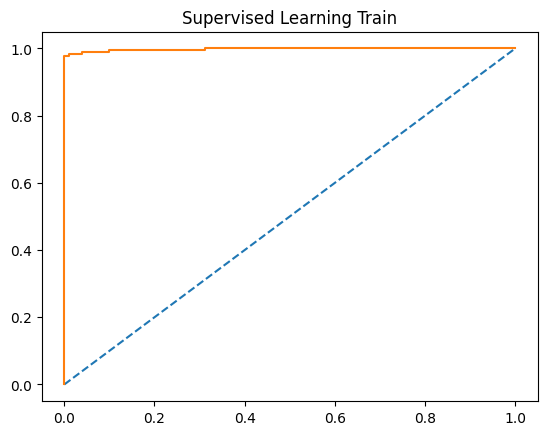

Best parameters: {'estimator__C': 1}
Best score: 0.9846153846153847
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.9736842105263158, 0.975609756097561, 0.9523809523809523, 0.963855421686747, 0.9692460317460317]
[0.9912087912087912, 1.0, 0.9764705882352941, 0.988095238095238, 0.9882352941176471]
--------------------------------------
Iteration: 2
Best parameters: {'estimator__C': 1}
Best score: 0.9670329670329669
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.9824561403508771, 0.9761904761904762, 0.9761904761904762, 0.9761904761904762, 0.9811507936507938]
[0.9846153846153847, 0.9939393939393939, 0.9647058823529412, 0.9791044776119404, 0.9805985552115584]
--------------------------------------
Iteration: 3
Best parameters: {'estimator__C': 1}
Best score: 0.9758241758241759
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.956140350877193, 0.9512195121951219, 0.9285714285714286, 0.9397590361445782, 0.9503968253968254]
[0.9868131868131869, 0.9880952380952381, 0.9764705882352941

In [5]:

iter = 30
metrics_label_super = ['accuracy', 'precision', 'recall', 'f1', 'auc']
metrics_train_super = []
metrics_test_super = []

for i in range(iter):
    X_train_supervised, X_test_supervised, y_train_supervised, y_test_supervised = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=i)
    # X_train_supervised = pd.DataFrame(normalize(X_train_supervised, norm='l1', copy=True), columns = X_data.columns)

    print(f'Iteration: {i+1}')
    params = {'estimator__C': [10**i for i in range(-5, 5)]}
        
    svm_super = svm.LinearSVC(penalty='l1', dual=False, loss='squared_hinge', max_iter=1000000)
    pipeline_super = Pipeline([
        ('scaler', MinMaxScaler()), 
                               ('estimator', svm_super)])
    model_super = GridSearchCV(pipeline_super, params, cv=5, n_jobs=-1)

    model_super.fit(X_train_supervised, y_train_supervised)

    y_pred_test = model_super.predict(X_test_supervised)
    y_pred_train = model_super.predict(X_train_supervised)

    y_prob_test = model_super.decision_function(X_test_supervised)
    y_prob_train = model_super.decision_function(X_train_supervised)

    fpr_test, tpr_test, _ = roc_curve(y_test_supervised, y_prob_test)
    fpr_train, tpr_train, _ = roc_curve(y_train_supervised, y_prob_train)

    cm_test = confusion_matrix(y_test_supervised, y_pred_test)
    cm_train = confusion_matrix(y_train_supervised, y_pred_train)

    if(i==0):
        print(f'Confusion Matrix Test \n', cm_test)
        print(f'Confusion Matrix Train \n', cm_train)
        ns_probs = [0 for _ in range(len(y_test_supervised))]
        ns_fpr, ns_tpr, _ = roc_curve(y_test_supervised, ns_probs)
        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_test, tpr_test, label='Test')
        plt.title('Supervised Learning Test')
        plt.show()

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_train, tpr_train, label='Train')
        plt.title('Supervised Learning Train')
        plt.show()

    # plot_roc(y_test_supervised, y_prob_test, title='Supervised Learning Test', plot_macro=False, plot_micro=False, classes_to_plot=[0], cmap='autumn')
    # plot_roc(y_train_supervised, y_prob_train, title='Supervised Learning Train', plot_macro=False, plot_micro=False, classes_to_plot=[0], cmap='autumn')

    prec_test, rec_test, f_test, _ = precision_recall_fscore_support(y_test_supervised, y_pred_test,  average='binary')
    prec_train, rec_train, f_train, _ = precision_recall_fscore_support(y_train_supervised, y_pred_train, average='binary')

    metrics_test_super.append([accuracy_score(y_test_supervised, y_pred_test), prec_test, rec_test,f_test, roc_auc_score(y_test_supervised, y_pred_test)])
    metrics_train_super.append([accuracy_score(y_train_supervised, y_pred_train), prec_train, rec_train, f_train, roc_auc_score(y_train_supervised, y_pred_train)])

    print(f'Best parameters: {model_super.best_params_}')
    print(f'Best score: {model_super.best_score_}')
    print(metrics_label_super)
    print(metrics_test_super[i])
    print(metrics_train_super[i])
    print('--------------------------------------')



In [6]:
res_train_df = pd.DataFrame(metrics_train_super, columns=metrics_label_super)
res_test_df = pd.DataFrame(metrics_test_super, columns=metrics_label_super)

tabulate_vals = []
tabulate_vals.append(['Train', res_train_df['accuracy'].mean(), res_train_df['precision'].mean(), res_train_df['recall'].mean(), res_train_df['f1'].mean(), res_train_df['auc'].mean()])
tabulate_vals.append(['Test', res_test_df['accuracy'].mean(), res_test_df['precision'].mean(), res_test_df['recall'].mean(), res_test_df['f1'].mean(), res_test_df['auc'].mean()])
# for i in range(len(metrics_label_spectral)):
#     tabulate_vals.append([metrics_label_spectral[i], res_train_df[metrics_label_spectral[i]].mean(), res_test_df[metrics_label_spectral[i]].mean()])

print(tabulate(tabulate_vals, headers=metrics_label_super, tablefmt='simple_outline'))

┌───────┬────────────┬─────────────┬──────────┬──────────┬──────────┐
│       │   accuracy │   precision │   recall │       f1 │      auc │
├───────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ Train │   0.985348 │    0.989818 │ 0.970784 │ 0.98019  │ 0.98241  │
│ Test  │   0.964912 │    0.970839 │ 0.933333 │ 0.951295 │ 0.958333 │
└───────┴────────────┴─────────────┴──────────┴──────────┴──────────┘


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

Iteration: 1
Confusion Matrix Test 
 [[70  2]
 [ 3 39]]
Confusion Matrix Train 
 [[282   3]
 [ 10 160]]


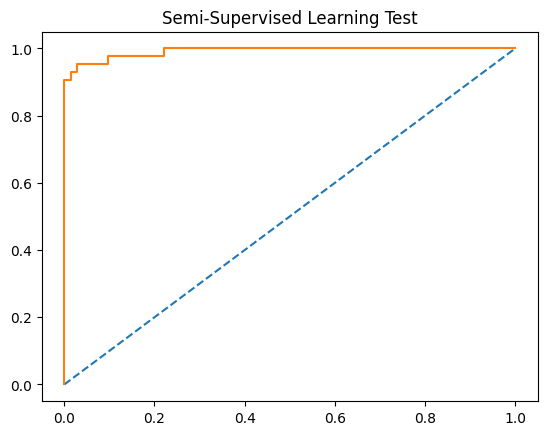

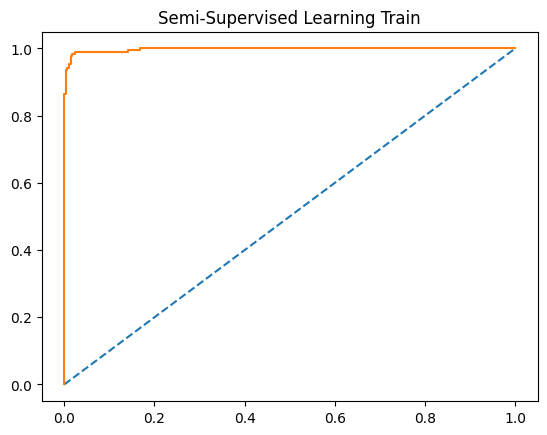

Best parameters: {'estimator__C': 10}
Best score: 0.9735265700483092
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.956140350877193, 0.9512195121951219, 0.9285714285714286, 0.9397590361445782, 0.9503968253968254]
[0.9714285714285714, 0.9815950920245399, 0.9411764705882353, 0.9609609609609611, 0.9653250773993808]
--------------------------------------
Iteration: 2
Best parameters: {'estimator__C': 1}
Best score: 0.9735265700483092
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.956140350877193, 0.9512195121951219, 0.9285714285714286, 0.9397590361445782, 0.9503968253968254]
[0.9824175824175824, 1.0, 0.9529411764705882, 0.9759036144578312, 0.9764705882352941]
--------------------------------------
Iteration: 3
Best parameters: {'estimator__C': 1}
Best score: 0.9647342995169084
['accuracy', 'precision', 'recall', 'f1', 'auc']
[0.956140350877193, 0.9512195121951219, 0.9285714285714286, 0.9397590361445782, 0.9503968253968254]
[0.9736263736263736, 0.9876543209876543, 0.94117647058823

In [7]:

iter = 30
metrics_label_semi = ['accuracy', 'precision', 'recall', 'f1', 'auc']
metrics_train_semi = []
metrics_test_semi = []

for i in range(iter):
    X_train_semi, X_test_semi, y_train_semi, y_test_semi = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=i)
    
    # X_train_semi = pd.DataFrame(normalize(X_train_semi, norm='l1', copy=True), columns = X_data.columns)

    X_train_label, X_train_unlabel, y_train_label, y_train_unlabel = train_test_split(X_train_semi, y_train_semi, test_size=0.5, stratify=y_train_semi, random_state=i)

    print(f'Iteration: {i+1}')
    params = {'estimator__C': [10**i for i in range(-4, 4)]}
        
    svm_super = svm.LinearSVC(penalty='l1', dual=False, loss='squared_hinge', max_iter=10000000)
    pipeline_super = Pipeline([
        ('scaler', MinMaxScaler()), 
                               ('estimator', svm_super)])
    model_semi = GridSearchCV(pipeline_super, params, cv=5, n_jobs=-1)

    model_semi.fit(X_train_label, y_train_label)

    estimator = model_semi.best_estimator_
    while(len(X_train_unlabel) > 0):
        desc_func = estimator.decision_function(X_train_unlabel)
        desc_func = np.abs(desc_func)
        idx = np.argmax(desc_func)


        pred = estimator.predict(pd.DataFrame(X_train_unlabel.iloc[idx].values.reshape(1, -1), columns=X_train_unlabel.columns))

        np.concatenate((X_train_label, X_train_unlabel.iloc[idx].values.reshape(1, -1)))
        np.concatenate((y_train_label, pred))

        X_train_unlabel = X_train_unlabel.drop(X_train_unlabel.index[idx])
        y_train_unlabel = y_train_unlabel.drop(y_train_unlabel.index[idx])

        estimator.fit(X_train_label, y_train_label)

    # print(X_test_semi.head())
    y_pred_test = estimator.predict(X_test_semi)
    y_pred_train = estimator.predict(X_train_semi)

    y_prob_test = estimator.decision_function(X_test_semi)
    y_prob_train = estimator.decision_function(X_train_semi)

    fpr_test, tpr_test, _ = roc_curve(y_test_semi, y_prob_test)
    fpr_train, tpr_train, _ = roc_curve(y_train_semi, y_prob_train)

    cm_test = confusion_matrix(y_test_semi, y_pred_test)
    cm_train = confusion_matrix(y_train_semi, y_pred_train)

    if(i==0):
        print(f'Confusion Matrix Test \n', cm_test)
        print(f'Confusion Matrix Train \n', cm_train)
        ns_probs = [0 for _ in range(len(y_test_semi))]
        ns_fpr, ns_tpr, _ = roc_curve(y_test_semi, ns_probs)
        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_test, tpr_test, label='Test')
        plt.title('Semi-Supervised Learning Test')
        plt.show()

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_train, tpr_train, label='Train')
        plt.title('Semi-Supervised Learning Train')
        plt.show()


    prec_test, rec_test, f_test, _ = precision_recall_fscore_support(y_test_semi, y_pred_test,  average='binary')
    prec_train, rec_train, f_train, _ = precision_recall_fscore_support(y_train_semi, y_pred_train, average='binary')

    metrics_test_semi.append([accuracy_score(y_test_semi, y_pred_test), prec_test, rec_test,f_test, roc_auc_score(y_test_semi, y_pred_test)])
    metrics_train_semi.append([accuracy_score(y_train_semi, y_pred_train), prec_train, rec_train, f_train, roc_auc_score(y_train_semi, y_pred_train)])

    print(f'Best parameters: {model_semi.best_params_}')
    print(f'Best score: {model_semi.best_score_}')
    print(metrics_label_semi)
    print(metrics_test_semi[i])
    print(metrics_train_semi[i])
    print('--------------------------------------')


In [8]:
res_train_df = pd.DataFrame(metrics_train_semi, columns=metrics_label_semi)
res_test_df = pd.DataFrame(metrics_test_semi, columns=metrics_label_semi)

tabulate_vals = []
tabulate_vals.append(['Train', res_train_df['accuracy'].mean(), res_train_df['precision'].mean(), res_train_df['recall'].mean(), res_train_df['f1'].mean(), res_train_df['auc'].mean()])
tabulate_vals.append(['Test', res_test_df['accuracy'].mean(), res_test_df['precision'].mean(), res_test_df['recall'].mean(), res_test_df['f1'].mean(), res_test_df['auc'].mean()])
# for i in range(len(metrics_label_spectral)):
#     tabulate_vals.append([metrics_label_spectral[i], res_train_df[metrics_label_spectral[i]].mean(), res_test_df[metrics_label_spectral[i]].mean()])

print(tabulate(tabulate_vals, headers=metrics_label_semi, tablefmt='simple_outline'))

┌───────┬────────────┬─────────────┬──────────┬──────────┬──────────┐
│       │   accuracy │   precision │   recall │       f1 │      auc │
├───────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ Train │   0.976337 │    0.979403 │ 0.957059 │ 0.967989 │ 0.972448 │
│ Test  │   0.95848  │    0.959701 │ 0.926984 │ 0.942539 │ 0.951918 │
└───────┴────────────┴─────────────┴──────────┴──────────┴──────────┘


##### (B)

B part done with A

#### (iii) Unsupervised Learning

##### (A)

How do you make sure that the algorithm was not trapped in a local minimum?  
* To avoid getting stuck in local minima, a common strategy is to run the algorithm several times and choose the best result. This is because it's hard to tell if the minimum we've found is a local or a global minimum. The K-means algorithm uses this approach with its 'n_init' parameter. By default, it starts with 10 different cluster points. Additionally, repeatedly using 'random_state' and randomly splitting the data into training and testing sets helps ensure that the algorithm doesn't settle on a local minimum.

Iteration: 1
Confusion Matrix Train 
 [[277   8]
 [ 33 137]]


Confusion Matrix Test 
 [[65  7]
 [ 7 35]]




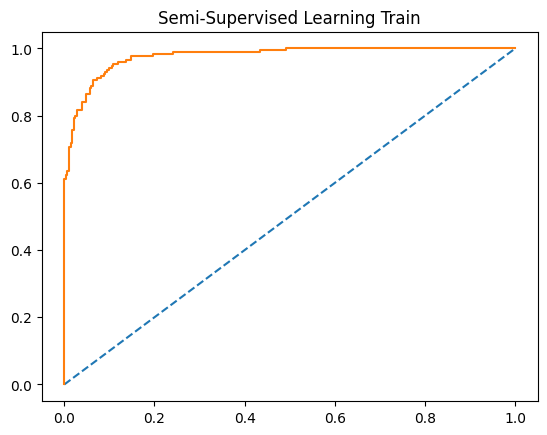

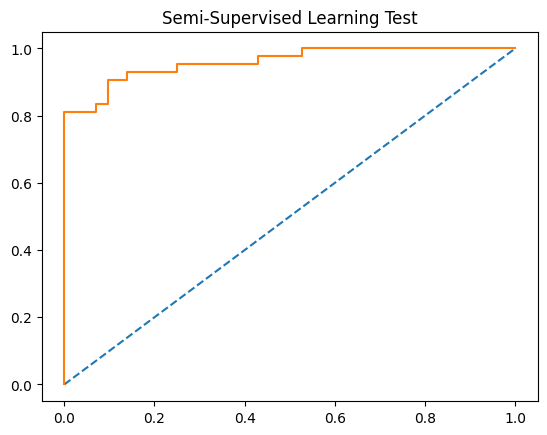

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30


In [9]:
iter = 30

metrics_label_unsupervised = ['accuracy', 'precision', 'recall', 'f1', 'auc']
metrics_train_unsupervised = []
metrics_test_unsupervised = []

for it in range(iter):
    print(f'Iteration: {it+1}')
    X_train_unsupervised, X_test_unsupervised, y_train_unsupervised, y_test_unsupervised = train_test_split(X_data, y_data, test_size=0.2, stratify=y_data, random_state=it)

    scaler = StandardScaler()

    X_train_unsupervised = pd.DataFrame(scaler.fit_transform(X_train_unsupervised), columns = X_data.columns)
    X_test_unsupervised = pd.DataFrame(scaler.transform(X_test_unsupervised), columns = X_data.columns)

    kmeans = KMeans(n_clusters=2, random_state=it, n_init=20)

    kmeans.fit(X_train_unsupervised)
    cluster_centers = kmeans.cluster_centers_

    reversed = False

    for i, cluster in enumerate(cluster_centers):
        closest_point_indices = np.argsort(pairwise_distances(cluster.reshape(1, -1), X_train_unsupervised))[0][:30]
        closest_points = y_train_unsupervised.iloc[closest_point_indices]
        unique, counts = np.unique(closest_points, return_counts=True)
        if(i != unique[np.argmax(counts)]):
            reversed = True
    
    y_pred_train = kmeans.predict(X_train_unsupervised)
    y_pred_test = kmeans.predict(X_test_unsupervised)

    y_train_dist = kmeans.transform(X_train_unsupervised)
    y_test_dist = kmeans.transform(X_test_unsupervised)

    y_prob_train = softmax(y_train_dist, axis=1)[:,0]
    y_prob_test = softmax(y_test_dist, axis=1)[:,0]

    if(reversed):
        y_pred_train = y_pred_train ^ 1
        y_pred_test = y_pred_test ^ 1
        y_prob_train = 1 - y_prob_train
        y_prob_test = 1 - y_prob_test

    fpr_test, tpr_test, _ = roc_curve(y_test_unsupervised, y_prob_test)
    fpr_train, tpr_train, _ = roc_curve(y_train_unsupervised, y_prob_train)

    cm_test = confusion_matrix(y_test_unsupervised, y_pred_test)
    cm_train = confusion_matrix(y_train_unsupervised, y_pred_train)

    if(it==0):

        print(f'Confusion Matrix Train \n', cm_train)
        print('\n')
        print(f'Confusion Matrix Test \n', cm_test)
        print('\n')
        ns_probs = [0 for _ in range(len(y_test_unsupervised))]
        ns_fpr, ns_tpr, _ = roc_curve(y_test_unsupervised, ns_probs)

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_train, tpr_train, label='Train')
        plt.title('Semi-Supervised Learning Train')
        plt.show()

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_test, tpr_test, label='Test')
        plt.title('Semi-Supervised Learning Test')
        plt.show()

        


    prec_test, rec_test, f_test, _ = precision_recall_fscore_support(y_test_unsupervised, y_pred_test,  average='binary')
    prec_train, rec_train, f_train, _ = precision_recall_fscore_support(y_train_unsupervised, y_pred_train, average='binary')

    metrics_test_unsupervised.append([accuracy_score(y_test_unsupervised, y_pred_test), prec_test, rec_test,f_test, roc_auc_score(y_test_unsupervised, y_pred_test)])
    metrics_train_unsupervised.append([accuracy_score(y_train_unsupervised, y_pred_train), prec_train, rec_train, f_train, roc_auc_score(y_train_unsupervised, y_pred_train)])

In [10]:
res_train_df = pd.DataFrame(metrics_train_unsupervised, columns=metrics_label_unsupervised)
res_test_df = pd.DataFrame(metrics_test_unsupervised, columns=metrics_label_unsupervised)

tabulate_vals = []
tabulate_vals.append(['Train', res_train_df['accuracy'].mean(), res_train_df['precision'].mean(), res_train_df['recall'].mean(), res_train_df['f1'].mean(), res_train_df['auc'].mean()])
tabulate_vals.append(['Test', res_test_df['accuracy'].mean(), res_test_df['precision'].mean(), res_test_df['recall'].mean(), res_test_df['f1'].mean(), res_test_df['auc'].mean()])
# for i in range(len(metrics_label_spectral)):
#     tabulate_vals.append([metrics_label_spectral[i], res_train_df[metrics_label_spectral[i]].mean(), res_test_df[metrics_label_spectral[i]].mean()])

print(tabulate(tabulate_vals, headers=metrics_label_unsupervised, tablefmt='simple_outline'))

┌───────┬────────────┬─────────────┬──────────┬──────────┬──────────┐
│       │   accuracy │   precision │   recall │       f1 │      auc │
├───────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ Train │   0.910256 │    0.923864 │ 0.828431 │ 0.873358 │ 0.893748 │
│ Test  │   0.905556 │    0.909718 │ 0.826984 │ 0.865157 │ 0.889187 │
└───────┴────────────┴─────────────┴──────────┴──────────┴──────────┘


##### (B)

Combined with A

#### (iv) Spectral Clustering

Iteration: 1

Confusion Matrix Train 
 [[280   5]
 [ 52 118]]


Confusion Matrix Test 
 [[70  2]
 [10 32]]




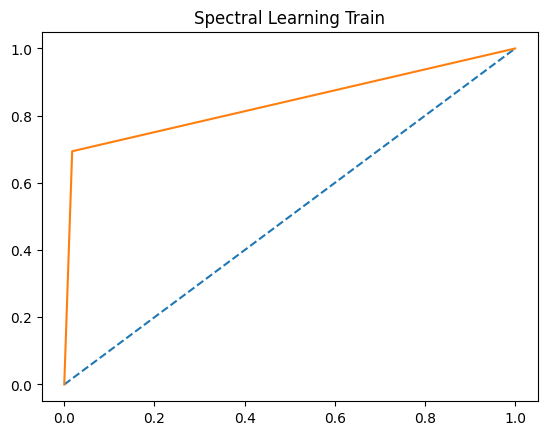

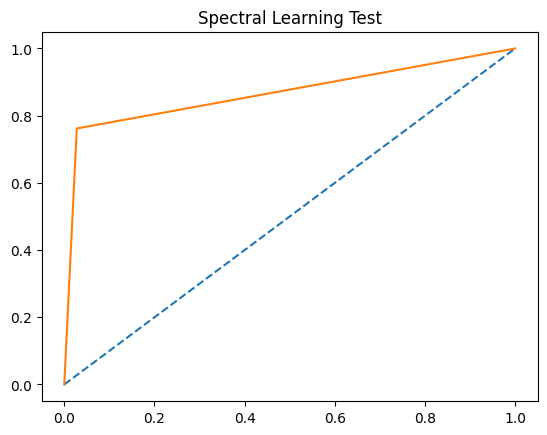

Iteration: 2

Iteration: 3

Iteration: 4

Iteration: 5

Iteration: 6

Iteration: 7

Iteration: 8

Iteration: 9

Iteration: 10

Iteration: 11

Iteration: 12

Iteration: 13

Iteration: 14

Iteration: 15

Iteration: 16

Iteration: 17

Iteration: 18

Iteration: 19

Iteration: 20

Iteration: 21

Iteration: 22

Iteration: 23

Iteration: 24

Iteration: 25

Iteration: 26

Iteration: 27

Iteration: 28

Iteration: 29

Iteration: 30



In [11]:
iter = 30

metrics_label_spectral = ['accuracy', 'precision', 'recall', 'f1', 'auc']
metrics_train_spectral = []
metrics_test_spectral = []


for it in range(iter):
    print(f'Iteration: {it+1}\n')
    X_train_spectral, X_test_spectral, y_train_spectral, y_test_spectral = train_test_split(X_data, y_data, test_size=0.2, random_state=it, stratify=y_data)
    # X_train_spectral = pd.DataFrame(normalize(X_train_spectral, norm='l1', copy=True), columns = X_data.columns)

    scaler = Normalizer()
    X_train_spectral = pd.DataFrame(scaler.fit_transform(X_train_spectral), columns = X_data.columns)
    X_test_spectral = pd.DataFrame(scaler.transform(X_test_spectral), columns = X_data.columns)
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', random_state=it, gamma=1.0, eigen_tol=1e-2, eigen_solver='arpack')

    y_pred_train = spectral.fit_predict(X_train_spectral)
    y_pred_test = spectral.fit_predict(X_test_spectral)

    cluster_labels = np.unique(y_pred_train)
    y_pred_train_modified = y_pred_train.copy()
    y_pred_test_modified = y_pred_test.copy()


    for label in cluster_labels:
        cluster_indices = np.where(y_pred_train == label)[0]
        cluster = y_train_spectral.iloc[cluster_indices]

        majority_label = np.argmax(np.bincount(cluster))
        y_pred_train_modified[cluster_indices] = majority_label


        cluster_indices = np.where(y_pred_test == label)[0]
        cluster = y_test_spectral.iloc[cluster_indices]

        majority_label = np.argmax(np.bincount(cluster))
        y_pred_test_modified[cluster_indices] = majority_label


    y_pred_train = y_pred_train_modified
    y_pred_test = y_pred_test_modified
    
    fpr_test, tpr_test, _ = roc_curve(y_test_spectral, y_pred_test)
    fpr_train, tpr_train, _ = roc_curve(y_train_spectral, y_pred_train)

    cm_test = confusion_matrix(y_test_spectral, y_pred_test)
    cm_train = confusion_matrix(y_train_spectral, y_pred_train)

    if(it==0):

        print(f'Confusion Matrix Train \n', cm_train)
        print('\n')
        print(f'Confusion Matrix Test \n', cm_test)
        print('\n')
        ns_probs = [0 for _ in range(len(y_test_spectral))]
        ns_fpr, ns_tpr, _ = roc_curve(y_test_spectral, ns_probs)

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_train, tpr_train, label='Train')
        plt.title('Spectral Learning Train')
        plt.show()

        plt.plot(ns_fpr, ns_tpr, linestyle='--')
        plt.plot(fpr_test, tpr_test, label='Test')
        plt.title('Spectral Learning Test')
        plt.show()

        


    prec_test, rec_test, f_test, _ = precision_recall_fscore_support(y_test_spectral, y_pred_test,  average='binary')
    prec_train, rec_train, f_train, _ = precision_recall_fscore_support(y_train_spectral, y_pred_train, average='binary')

    metrics_test_spectral.append([accuracy_score(y_test_spectral, y_pred_test), prec_test, rec_test,f_test, roc_auc_score(y_test_spectral, y_pred_test)])
    metrics_train_spectral.append([accuracy_score(y_train_spectral, y_pred_train), prec_train, rec_train, f_train, roc_auc_score(y_train_spectral, y_pred_train)])   

    

    

In [12]:
# metrics_label_spectral = ['accuracy', 'precision', 'recall', 'f1', 'auc']
res_train_df = pd.DataFrame(metrics_train_spectral, columns=metrics_label_spectral)
res_test_df = pd.DataFrame(metrics_test_spectral, columns=metrics_label_spectral)

tabulate_vals = []
tabulate_vals.append(['Train', res_train_df['accuracy'].mean(), res_train_df['precision'].mean(), res_train_df['recall'].mean(), res_train_df['f1'].mean(), res_train_df['auc'].mean()])
tabulate_vals.append(['Test', res_test_df['accuracy'].mean(), res_test_df['precision'].mean(), res_test_df['recall'].mean(), res_test_df['f1'].mean(), res_test_df['auc'].mean()])
# for i in range(len(metrics_label_spectral)):
#     tabulate_vals.append([metrics_label_spectral[i], res_train_df[metrics_label_spectral[i]].mean(), res_test_df[metrics_label_spectral[i]].mean()])

print(tabulate(tabulate_vals, headers=metrics_label_spectral, tablefmt='simple_outline'))

┌───────┬────────────┬─────────────┬──────────┬──────────┬──────────┐
│       │   accuracy │   precision │   recall │       f1 │      auc │
├───────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ Train │   0.883297 │    0.960396 │ 0.717255 │ 0.82106  │ 0.849797 │
│ Test  │   0.87924  │    0.947435 │ 0.715873 │ 0.810786 │ 0.845205 │
└───────┴────────────┴─────────────┴──────────┴──────────┴──────────┘


#### (iv) Compare

In [13]:
super_train_df = pd.DataFrame(metrics_train_super, columns=metrics_label_super)
super_test_df = pd.DataFrame(metrics_test_super, columns=metrics_label_super)

semi_train_df = pd.DataFrame(metrics_train_semi, columns=metrics_label_semi)
semi_test_df = pd.DataFrame(metrics_test_semi, columns=metrics_label_semi)

unsuper_train_df = pd.DataFrame(metrics_train_unsupervised, columns=metrics_label_unsupervised)
unsuper_test_df = pd.DataFrame(metrics_test_unsupervised, columns=metrics_label_unsupervised)

sepctral_train_df = pd.DataFrame(metrics_train_spectral, columns=metrics_label_spectral)
sepctral_test_df = pd.DataFrame(metrics_test_spectral, columns=metrics_label_spectral)

tabulate_vals = []
tabulate_vals.append(['Supervised Train',super_train_df['accuracy'].mean(), super_train_df['precision'].mean(), super_train_df['recall'].mean(), super_train_df['f1'].mean(), super_train_df['auc'].mean()])
tabulate_vals.append(['Supervised Test', super_test_df['accuracy'].mean(), super_test_df['precision'].mean(), super_test_df['recall'].mean(), super_test_df['f1'].mean(), super_test_df['auc'].mean()])

tabulate_vals.append(['Semi-Supervised Train',semi_train_df['accuracy'].mean(), semi_train_df['precision'].mean(), semi_train_df['recall'].mean(), semi_train_df['f1'].mean(), semi_train_df['auc'].mean()])
tabulate_vals.append(['Semi-Supervised Test', semi_test_df['accuracy'].mean(), semi_test_df['precision'].mean(), semi_test_df['recall'].mean(), semi_test_df['f1'].mean(), semi_test_df['auc'].mean()])

tabulate_vals.append(['Unsupervised Train',unsuper_train_df['accuracy'].mean(), unsuper_train_df['precision'].mean(), unsuper_train_df['recall'].mean(), unsuper_train_df['f1'].mean(), unsuper_train_df['auc'].mean()])
tabulate_vals.append(['Unsupervised Test', unsuper_test_df['accuracy'].mean(), unsuper_test_df['precision'].mean(), unsuper_test_df['recall'].mean(), unsuper_test_df['f1'].mean(), unsuper_test_df['auc'].mean()])

tabulate_vals.append(['Spectral Train',sepctral_train_df['accuracy'].mean(), sepctral_train_df['precision'].mean(), sepctral_train_df['recall'].mean(), sepctral_train_df['f1'].mean(), sepctral_train_df['auc'].mean()])
tabulate_vals.append(['Spectral Test', sepctral_test_df['accuracy'].mean(), sepctral_test_df['precision'].mean(), sepctral_test_df['recall'].mean(), sepctral_test_df['f1'].mean(), sepctral_test_df['auc'].mean()])

# for i in range(len(metrics_label_spectral)):
#     tabulate_vals.append([metrics_label_spectral[i], res_train_df[metrics_label_spectral[i]].mean(), res_test_df[metrics_label_spectral[i]].mean()])

print(tabulate(tabulate_vals, headers=metrics_label_spectral, tablefmt='simple_outline'))

┌───────────────────────┬────────────┬─────────────┬──────────┬──────────┬──────────┐
│                       │   accuracy │   precision │   recall │       f1 │      auc │
├───────────────────────┼────────────┼─────────────┼──────────┼──────────┼──────────┤
│ Supervised Train      │   0.985348 │    0.989818 │ 0.970784 │ 0.98019  │ 0.98241  │
│ Supervised Test       │   0.964912 │    0.970839 │ 0.933333 │ 0.951295 │ 0.958333 │
│ Semi-Supervised Train │   0.976337 │    0.979403 │ 0.957059 │ 0.967989 │ 0.972448 │
│ Semi-Supervised Test  │   0.95848  │    0.959701 │ 0.926984 │ 0.942539 │ 0.951918 │
│ Unsupervised Train    │   0.910256 │    0.923864 │ 0.828431 │ 0.873358 │ 0.893748 │
│ Unsupervised Test     │   0.905556 │    0.909718 │ 0.826984 │ 0.865157 │ 0.889187 │
│ Spectral Train        │   0.883297 │    0.960396 │ 0.717255 │ 0.82106  │ 0.849797 │
│ Spectral Test         │   0.87924  │    0.947435 │ 0.715873 │ 0.810786 │ 0.845205 │
└───────────────────────┴────────────┴─────────────┴──

We might think that supervised learning usually outperforms semi-supervised learning, but in our tests, the semi-supervised models were only slightly less effective than the supervised ones. Interestingly, the semi-supervised approach even had higher precision than the supervised models. On the other hand, we typically expect unsupervised learning to be less effective than the other models, but here it's a different story. The unsupervised model's Test AUC score was actually better than both the supervised and semi-supervised models, suggesting it's more adept at handling the randomness in our data. As for Spectral Clustering, it turned out to be the least effective, which implies that our data is quite straightforward to separate in the existing dimensions and doesn't require more complex, radial dimensions for explanation.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [14]:
# url = 'https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip'
# filename = '../data/banknote+authentication.zip'
# urlretrieve(url, filename)
# zip = zipfile.ZipFile('../data/banknote+authentication.zip', 'r').extractall('../data/')

In [15]:
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
bank_data = pd.read_csv('../data/data_banknote_authentication.txt',delimiter=',', header=None, names=cols)
print(bank_data.head())
bank_train, bank_test = train_test_split(bank_data, train_size=900, random_state=0)
print(bank_train.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
      variance  skewness  curtosis  entropy  class
1061   -2.3147    3.6668  -0.69690 -1.24740      1
646     1.1620   10.2926  -1.28210 -4.03920      0
422     4.8368   10.0132  -4.32390 -4.32760      0
294     2.5068    1.1588   3.92490  0.12585      0
261     3.1557    2.8908   0.59693  0.79825      0


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [16]:
passive_test_errors = []
print(bank_train.shape)
for it in range(50):

    passive_bank_train = bank_train.copy()
    print(f'Iteration: {it+1}')
    pool_data = pd.DataFrame(columns=passive_bank_train.columns)
    pool_data['class'] = pd.to_numeric(pool_data['class'])
    test_errors = []

    for i in range(90):

        if(passive_bank_train.shape[0] == 0):
            print('All data used')
            break
        
        selected_data = passive_bank_train.sample(n=10, random_state=i)
        pool_data = pd.concat([pool_data, selected_data])
        passive_bank_train = passive_bank_train.drop(selected_data.index)

        X_train = pool_data.drop(columns=['class'])
        y_train = pool_data['class']
        X_test = bank_test.drop(columns=['class'])
        y_test = bank_test['class']

        if(pool_data['class'].nunique() == 1):
            test_error = 0

            if(pool_data['class'].unique()[0] == 0):
                test_error = 1 - accuracy_score(y_test, np.zeros(len(y_test)))
            else:
                test_error = 1 - accuracy_score(y_test, np.ones(len(y_test)))

            test_errors.append(test_error)
            continue

        param_grid = {'estimator__C': [10**i for i in range(-5, 5)]}

        pipeline = Pipeline([
            ('scaler', StandardScaler()), 
            ('estimator', svm.LinearSVC(penalty='l1', dual=False, max_iter=1000000, random_state=it))])
        
        model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors.append(test_error)
    
    passive_test_errors.append(test_errors)
        

(900, 5)
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50


#### (ii) Active

In [17]:
active_test_errors = []


for it in range(50):
    print(f'Iteration: {it+1}')
    active_bank_train = bank_train.copy()
    pool_data = pd.DataFrame(columns=bank_train.columns)
    pool_data['class'] = pd.to_numeric(pool_data['class'])
    test_errors = []

    desc_func = None

    for i in range(90):
        selected_data = None

        if(i==0):
            selected_data = active_bank_train.sample(n=10, random_state=i)
        else:
            closest_poins = np.abs(desc_func)
            point_distances = pd.DataFrame(closest_poins, columns=['distance'])
            point_distances['index'] = point_distances.index
            point_distances = point_distances.sort_values(by=['distance'], ascending=False)
            selected_data = active_bank_train.iloc[point_distances['index'][:10]]

        
        pool_data = pd.concat([pool_data, selected_data])
        active_bank_train = active_bank_train.drop(selected_data.index)

        X_train = pool_data.drop(columns=['class'])
        y_train = pool_data['class']
        X_test = bank_test.drop(columns=['class'])
        y_test = bank_test['class']

        if(pool_data['class'].nunique() == 1):
            test_error = 0

            if(pool_data['class'].unique()[0] == 0):
                test_error = 1 - accuracy_score(y_test, np.zeros(len(y_test)))
            else:
                test_error = 1 - accuracy_score(y_test, np.ones(len(y_test)))

            test_errors.append(test_error)
            continue

        param_grid = {'estimator__C': [10**i for i in range(-5, 5)]}

        pipeline = Pipeline([
            ('scaler', StandardScaler()), 
            ('estimator', svm.LinearSVC(penalty='l1', dual=False, max_iter=1000000))])
        
        model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors.append(test_error)

        if(i<89):
            desc_func = model.decision_function(active_bank_train.drop(columns=['class']))
    
    active_test_errors.append(test_errors)
        

Iteration: 1
Iteration: 2
Iteration: 3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 21
Iteration: 22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 23
Iteration: 24
Iteration: 25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50


### (c) Average the 50 test errors

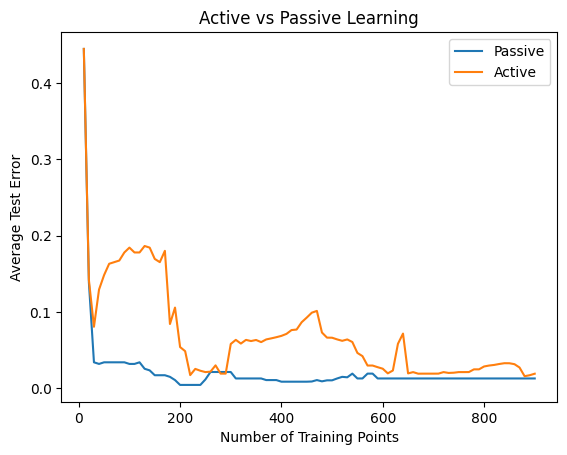

In [18]:
average_passive_test_errors = np.mean(passive_test_errors, axis=0)
average_active_test_errors = np.mean(active_test_errors, axis=0)

plt.plot(range(10,901,10), average_passive_test_errors, label='Passive')
plt.plot(range(10,901,10), average_active_test_errors, label='Active')
plt.xlabel('Number of Training Points')
plt.ylabel('Average Test Error')
plt.title('Active vs Passive Learning')
plt.legend()
plt.show()


* We can observe from the above graph that Active learning attains the stable value earlier than Passive learning   
* Passive learning generally has a lower test error rate than Active learning throughout the graph  
* The active learning curve has more spikes which shows us that the data is actively selected and used for training